# Capstone Project - The Battle of Neighborhoods Part 2
## Boris Chepikov

## Table of contents
* [Introduction](#i)
* [Data Description](#dd)
* [Methodology](#edm)
* [Result and Analysis](#res)
* [Discussion](#disc)
* [Conclusion](#conc)

## 1. Introduction <a name="i"></a>

#### One of the most frequently questioned business problem for entrepreneurs on the first stage is where and what to business. Accodring to the article, "10 Tips For Starting A Small Business That You Haven't Heard A Thousand Times Already", by Mike Kappel at forbe.com, those factors are highly considered for that the where and what factors critically affect business's wellness. So, what should entrepreneurs do? To answer 'where' and 'what' questions, it is important and highly necessary to look over what businesses are populated around the town and what factors affect to the businesses at first. To see this, building a model to make decision for the questions should be based. However, this requires lots of time and efforts. For such limitation, this project is employed to process several datasets for the businesses in Toronto, Canada and process the dataset to extract as many features as possible to analyze what are the critical factors for a successful business model. Therefore, to boost, looking over and analyzing business types or categories with the consideration as many feature as possible may be efficient and will drag the entrepreneurs to progress.

#### Additionally, it is also important to analyze where people are populated. If a business is started at the place where people barely go, the business will shut down even though it has no competitors. According to the article, "Why Is Population Growth Good For Businesses?", by Adam Ozimek at forbes.com, the population highly matters for businesses with the reasons that 1) a growing population means greater demand, but it also means greater supply and 2) in a growing market, entrepreneurs compete with incumbent businesses for new customers whereas in a shrinking market entrepreneurs compete for incumbent businesses for their existing customers. Therefore, this project will also look over the population by each postal code as well.

## 2. Data Description <a name="dd"></a>

#### For this project, the two datasets are used. 

#### One is 'Municipal Licensing and Standards - Business Licenses and Permits' dataset from the City of Toronto. 

[City of Toronto] : https://open.toronto.ca/dataset/municipal-licensing-and-standards-business-licences-and-permits/

#### Another dataset is from Statistics Canada for the population by postal code in Canada in 2016.

[Statistics Canada] : https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Table.cfm?Lang=Eng&T=1201&S=22&O=A

#### The first dataset contains the followings:
* Category - Type of license or permit
* License No - Number of license issued by City of Toronto
* Operating Name - Name that company operates under
* Issued - Date of issue of license/permit
* Client Name - Name that the license is issued to
* Business Phone - Client Business Phone Number
* Business Phone Ext. - Client Business Phone Extension Number
* License Address Line 1 - First line of client's business address
* License Address Line 2 - Client address town and province
* License Address Line 3 - Client address postal code
* Conditions - Restriction on the license/permit as recorded in the licensing system
* Free Form Conditions Line 1 - Restriction/comment on the license/permit
* Free Form Conditions Line 2 - Continuation of line 1
* Plate No. - License identifying plate, issued to most vehicles
* Endorsements - Activity permitted under the license
* Cancel Date - Date the license or permit was canceled.

#### The second dataset contains: 
* Geographic code
* Province or territory
* Incompletely enumerated Indian reserves and Indian settlements, 2016
* Population, 2016
* Total private dwellings, 2016
* Private dwellings occupied by usual residents, 2016

#### The first dataset is used for the numbers of businesses by business types in each town in Toronto, and the second dataset from Statistics Canada will be used for analyzing populations by postal codes in Canada.

## 3. Methodology<a name="edm"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#First dataset
businesses_toronto = pd.read_csv("/resources/labs/DP0701EN/business-licences.csv")
businesses_toronto = businesses_toronto.set_index('_id')
businesses_toronto.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Category,Licence No.,Operating Name,Issued,Client Name,Business Phone,Business Phone Ext.,Licence Address Line 1,Licence Address Line 2,Licence Address Line 3,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Plate No.,Endorsements,Cancel Date
_id,,,,,,,,,,,,,,,,
1,PRIVATE TRANSPORTATION COMPANY,B02-4741962,TAXIFY,2018-01-18T00:00:00,TAXIFY CANADA INC,NaN,NaN,"35 OAK ST, #304","TORONTO, ON",M9N 1A1,TAXIFY;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,2018-12-07T00:00:00
2,PRIVATE TRANSPORTATION COMPANY,B02-4728645,INSTARYDE,2017-09-08T00:00:00,INSTARYDE INC,NaN,NaN,425 ALNESS ST,"TORONTO, ON",M3J 2T8,INSTARYDE;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,2018-12-10T00:00:00
3,PRIVATE TRANSPORTATION COMPANY,B02-4653451,UBER CANADA,2016-08-16T00:00:00,UBER CANADA INC,NaN,NaN,"121 BLOOR ST E, #1600","TORONTO, ON",M4W 3M5,MAILING ADDRESS ONLY; MUST COMPLY WITH CITY/ZO...,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,NaN
4,PRIVATE TRANSPORTATION COMPANY,B02-4691773,FACEDRIVE,2017-04-04T00:00:00,FACEDRIVE INC,NaN,NaN,"200 CONSUMERS RD, #212","TORONTO, ON",M2J 4R4,FACEDRIVE;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,NaN
5,PRIVATE TRANSPORTATION COMPANY,B02-4714142,RIDEIN,2017-05-18T00:00:00,RIDE INC,4.162314e+09,NaN,379 BERING AVE,"TORONTO, ON",M8Z 3B1,RIDEIN;,NaN,NaN,NaN,PRIVATE TRANSPORTATION COMPANY;,NaN


In [3]:
cols = ['Category', 'Client Name', 'Licence Address Line 3', 'Cancel Date']
businesses_toronto = businesses_toronto[cols]
businesses_toronto['Licence Address Line 3'] = businesses_toronto['Licence Address Line 3'].str.split(' ').str[0].tolist()
businesses_toronto.columns= ['Category', 'Venue', 'PostalCode', 'Canceled']

In [4]:
businesses_toronto.head()

,Category,Venue,PostalCode,Canceled
_id,,,,
1,PRIVATE TRANSPORTATION COMPANY,TAXIFY CANADA INC,M9N,2018-12-07T00:00:00
2,PRIVATE TRANSPORTATION COMPANY,INSTARYDE INC,M3J,2018-12-10T00:00:00
3,PRIVATE TRANSPORTATION COMPANY,UBER CANADA INC,M4W,NaN
4,PRIVATE TRANSPORTATION COMPANY,FACEDRIVE INC,M2J,NaN
5,PRIVATE TRANSPORTATION COMPANY,RIDE INC,M8Z,NaN


In [5]:
businesses_toronto['Canceled'] = businesses_toronto['Canceled'].replace(np.nan, False)
businesses_toronto['Canceled'].loc[businesses_toronto['Canceled'] != False] = True

In [6]:
businesses_toronto.head()

,Category,Venue,PostalCode,Canceled
_id,,,,
1,PRIVATE TRANSPORTATION COMPANY,TAXIFY CANADA INC,M9N,True
2,PRIVATE TRANSPORTATION COMPANY,INSTARYDE INC,M3J,True
3,PRIVATE TRANSPORTATION COMPANY,UBER CANADA INC,M4W,False
4,PRIVATE TRANSPORTATION COMPANY,FACEDRIVE INC,M2J,False
5,PRIVATE TRANSPORTATION COMPANY,RIDE INC,M8Z,False


In [4]:
population_canada = pd.read_csv("http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Tables/File.cfm?T=1201&SR=1&RPP=9999&PR=0&CMA=0&CSD=0&S=22&O=A&Lang=Eng&OFT=CSV", encoding= 'unicode_escape')
population_canada = pd.DataFrame(population_canada)
population_canada = population_canada.drop(0, axis = 0)
cols = ['Geographic code', 'Population, 2016']
population_canada2 = population_canada[cols]
population_canada2.head()

,Geographic code,"Population, 2016"
1,A0A,46587.0
2,A0B,19792.0
3,A0C,12587.0
4,A0E,22294.0
5,A0G,35266.0


In [8]:
df = pd.merge(businesses_toronto, population_canada2, how = 'inner', left_on = 'PostalCode', right_on = 'Geographic code')
df = df.drop('Geographic code', axis =1)

In [2]:
venues_postalcode_toronto = pd.read_csv('/resources/labs/DP0701EN/Toronto_venues_merged.csv').drop('Unnamed: 0', axis = 1)
cols = ['PostalCode', 'Borough', 'Neighborhood']
venues_postalcode_toronto2 = venues_postalcode_toronto[cols]

In [3]:
venues_postalcode_toronto2.head()

,PostalCode,Borough,Neighborhood
0,M1B,"Scarborough,Scarborough","Rouge,Malvern"
1,M1C,"Scarborough,Scarborough,Scarborough","Highland Creek,Rouge Hill,Port Union"
2,M1E,"Scarborough,Scarborough,Scarborough","Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [10]:
df2 = pd.merge(df, venues_postalcode_toronto2, how = 'inner', left_on = 'PostalCode', right_on = 'PostalCode').drop_duplicates()

In [11]:
df2.groupby('PostalCode').count().reset_index().sort_values('Venue', ascending = False)

,PostalCode,Category,Venue,Canceled,"Population, 2016",Borough,Neighborhood
67,M5T,3141,3141,3141,3141,3141,3141
29,M3J,2885,2885,2885,2885,2885,2885
68,M5V,2784,2784,2784,2784,2784,2784
100,M9W,2692,2692,2692,2692,2692,2692
10,M1P,2478,2478,2478,2478,2478,2478
...,...,...,...,...,...,...,...
61,M5L,121,121,121,121,121,121
20,M2L,120,120,120,120,120,120
23,M2P,116,116,116,116,116,116
85,M7A,15,15,15,15,15,15


In [12]:
df_onehot = pd.get_dummies(df2[['Category']], prefix = "", prefix_sep ="")

In [13]:
df_onehot['PostalCode'] = df2['PostalCode']
cols = list(df_onehot.columns.values)
cols.pop(cols.index('PostalCode'))
df_onehot = df_onehot[['PostalCode'] + cols]
df_onehot.head()

,PostalCode,ADULT ENTERTAINMENT CLUB,ADVERTISING,AUCTIONEER,AUTO SERVICE STATION,BATH HOUSE,BILL DISTRIBUTOR,BILLIARD HALL,BOATS FOR HIRE,BODY RUB PARLOUR,...,TEMPORARY SIGN - A-FRAME,TEMPORARY SIGN - GROUND-MOUNTED,TEMPORARY SIGN - MOBILE,TEMPORARY SIGN - NEW DEVELOPMENT,TEMPORARY SIGN - PORTABLE,TEMPORARY SIGN PROVIDER,THEATRE,TORONTO TAXICAB OWNER,TOW TRUCK OWNER,TRANSIENT TRADER
0,M9N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M9N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M9N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M9N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,M9N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
toronto_grouped = df_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped.head()

,PostalCode,ADULT ENTERTAINMENT CLUB,ADVERTISING,AUCTIONEER,AUTO SERVICE STATION,BATH HOUSE,BILL DISTRIBUTOR,BILLIARD HALL,BOATS FOR HIRE,BODY RUB PARLOUR,...,TEMPORARY SIGN - A-FRAME,TEMPORARY SIGN - GROUND-MOUNTED,TEMPORARY SIGN - MOBILE,TEMPORARY SIGN - NEW DEVELOPMENT,TEMPORARY SIGN - PORTABLE,TEMPORARY SIGN PROVIDER,THEATRE,TORONTO TAXICAB OWNER,TOW TRUCK OWNER,TRANSIENT TRADER
0,M1B,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.001579,0.0,0.009471,0.0,0.0,0.0,0.001579,0.012628,0.014996,0.0
1,M1C,0.001148,0.000000,0.000000,0.0,0.0,0.0,0.002296,0.0,0.000000,...,0.001148,0.0,0.008037,0.0,0.0,0.0,0.000000,0.004592,0.016073,0.0
2,M1E,0.000000,0.000000,0.002044,0.0,0.0,0.0,0.001362,0.0,0.002725,...,0.000681,0.0,0.007493,0.0,0.0,0.0,0.000000,0.005450,0.010218,0.0
3,M1G,0.000000,0.001626,0.001626,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.001626,0.0,0.006504,0.0,0.0,0.0,0.000000,0.013008,0.017886,0.0
4,M1H,0.000000,0.000000,0.000854,0.0,0.0,0.0,0.000854,0.0,0.000000,...,0.000000,0.0,0.007686,0.0,0.0,0.0,0.000854,0.003416,0.018787,0.0


In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1B,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,BUILDING RENOVATOR,PERSONAL SERVICES SETTINGS
1,M1C,PUBLIC GARAGE,EATING ESTABLISHMENT,RETAIL STORE (FOOD),BUILDING RENOVATOR,TAXICAB OWNER
2,M1E,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,BUILDING RENOVATOR,PERSONAL SERVICES SETTINGS
3,M1G,RETAIL STORE (FOOD),EATING ESTABLISHMENT,BUILDING RENOVATOR,TAXICAB OWNER,DRIVING INSTRUCTOR (V)
4,M1H,RETAIL STORE (FOOD),EATING ESTABLISHMENT,PUBLIC GARAGE,PERSONAL SERVICES SETTINGS,BUILDING RENOVATOR


In [17]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 1, 1, 1, 1, 3, 3, 3, 1], dtype=int32)

In [18]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('PostalCode'), on='PostalCode')
toronto_merged = toronto_merged.drop(['Venue', '5th Most Common Venue'], axis =1)

In [19]:
toronto_merged.head()

,Category,PostalCode,Canceled,"Population, 2016",Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,PRIVATE TRANSPORTATION COMPANY,M9N,True,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS
1,TAXICAB BROKER,M9N,True,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS
3,TAXICAB BROKER,M9N,True,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS
4,DRIVING SCHOOL OPERATOR (B),M9N,True,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS
5,DRIVING SCHOOL OPERATOR (B),M9N,True,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS


In [20]:
toronto_completed = toronto_merged.reindex(columns=['Category',
 'PostalCode',
 'Population, 2016',
 'Borough',
 'Neighborhood',
 'Cluster Labels',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 'Canceled'])

In [21]:
toronto_completed.head()

,Category,PostalCode,"Population, 2016",Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,Canceled
0,PRIVATE TRANSPORTATION COMPANY,M9N,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS,True
1,TAXICAB BROKER,M9N,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS,True
3,TAXICAB BROKER,M9N,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS,True
4,DRIVING SCHOOL OPERATOR (B),M9N,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS,True
5,DRIVING SCHOOL OPERATOR (B),M9N,25074.0,York,Weston,1,EATING ESTABLISHMENT,RETAIL STORE (FOOD),PUBLIC GARAGE,PERSONAL SERVICES SETTINGS,True


In [22]:
toronto_completed.dtypes
toronto_completed['Population, 2016'] = toronto_completed['Population, 2016'].astype(str)
toronto_completed['Cluster Labels'] = toronto_completed['Cluster Labels'].astype(str)
toronto_completed['Canceled'] = toronto_completed['Canceled'].astype(str)

In [23]:
#Decision Tree Algorithm applied
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [24]:
X = toronto_completed[['Category',
 'PostalCode',
 'Population, 2016',
 'Borough',
 'Neighborhood',
 'Cluster Labels',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue']].values

In [25]:
encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['Category'].unique()))
X[:,0] = encoder.transform(X[:,0])

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['PostalCode'].unique()))
X[:,1] = encoder.transform(X[:,1]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['Population, 2016'].unique()))
X[:,2] = encoder.transform(X[:,2]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['Borough'].unique()))
X[:,3] = encoder.transform(X[:,3]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['Neighborhood'].unique()))
X[:,4] = encoder.transform(X[:,4]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['Cluster Labels'].unique()))
X[:,5] = encoder.transform(X[:,5]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['1st Most Common Venue'].unique()))
X[:,6] = encoder.transform(X[:,6]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['2nd Most Common Venue'].unique()))
X[:,7] = encoder.transform(X[:,7]) 

encoder = preprocessing.LabelEncoder()
encoder.fit(list(toronto_completed['3rd Most Common Venue'].unique()))
X[:,8] = encoder.transform(X[:,8]) 

In [26]:
X[0:8]

array([[58, 96, 44, 28, 93, 1, 1, 3, 5],
       [70, 96, 44, 28, 93, 1, 1, 3, 5],
       [70, 96, 44, 28, 93, 1, 1, 3, 5],
       [25, 96, 44, 28, 93, 1, 1, 3, 5],
       [25, 96, 44, 28, 93, 1, 1, 3, 5],
       [25, 96, 44, 28, 93, 1, 1, 3, 5],
       [25, 96, 44, 28, 93, 1, 1, 3, 5],
       [25, 96, 44, 28, 93, 1, 1, 3, 5]], dtype=object)

In [27]:
y = toronto_completed['Canceled']

In [28]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [29]:
Toronto_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Toronto_Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
Toronto_Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
predTree = Toronto_Tree.predict(X_testset)

In [32]:
print (predTree [0:5])
print (y_testset [0:5])

['True' 'True' 'True' 'True' 'True']
95832     True
59430     True
69986    False
38845     True
98629     True
Name: Canceled, dtype: object


In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7481936621721568


In [34]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

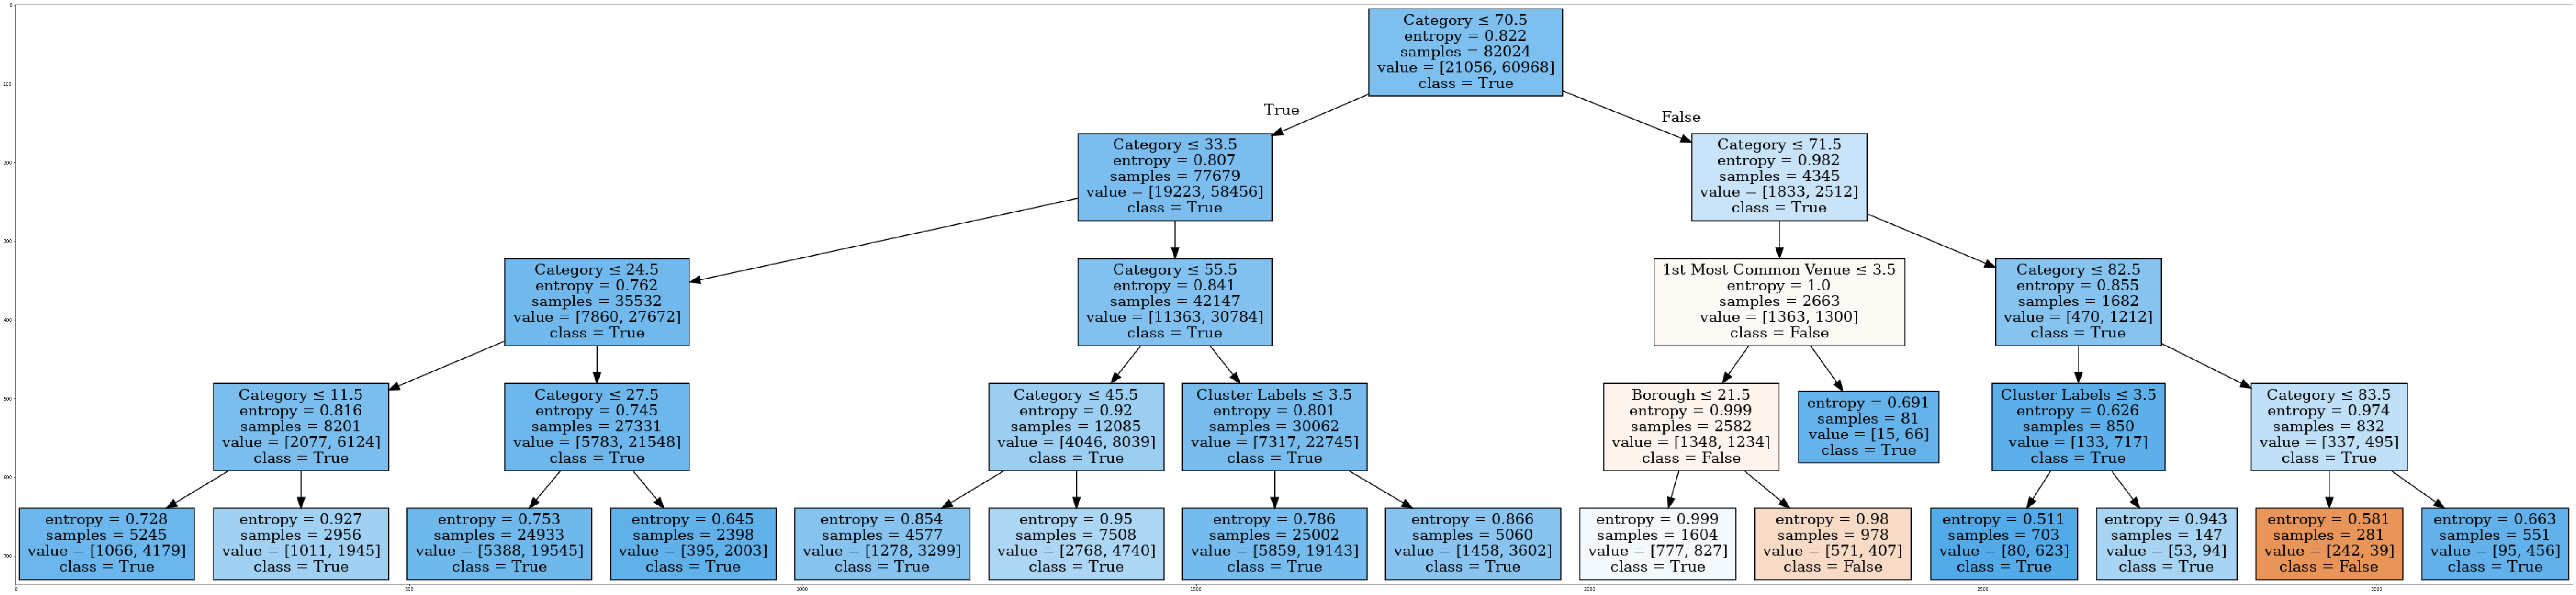

In [35]:
dot_data = StringIO()
filename = "Toronto_tree.png"
featureNames = toronto_completed.columns[0:9]
targetNames =  toronto_completed["Canceled"].unique().tolist()
out=tree.export_graphviz(Toronto_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## 4. Result and Analysis <a name="res"></a>
With the accuracy score, approximately 0.75, a decision tree model is generated with the features that may affect to the business's success. The model shows the categories 'Borough' and 'business category' highly impact to the failure of business with the entropies 0.999 and 0.974 respectively. For other factors, there do not have risks for business. 

## 5. Discussion and Limitation<a name="disc"></a>
This project aims to find the right and affordable place to business for entrepreneurs in terms of the population and the number of businesses by venue categories for each postal code, and build a model. 

The result seems to show that only two factors among others are critical to business's wellness. There may be other attributes that may affect. Meaning that there may exist some other factors that may impact to business's wellness such as the amount of tax, cost for real estate, people' incomes, and others by each postal code. However, to source other attributes was not accessible because those data are not publicly opened.

Also, this project assumes that the good business condition is based on the condition of business license, meaning that if there is any restriction or comment on business license or permit, the business in going to the defunct. 

## 6. Conslusion <a name="conc"></a>
The very frequent questions for entrepreneurs are where and what to business. To solve such problems, this project is conducted to build a model to find the most affordable place based on the uniqueness of business by venue categories, the population for each cluster which involves one or many postal code areas, and others.  

For the resources for the datasets, two datasets are chosen: the dataset, "Municipal Licensing and Standards - Business Licenses and Permits" for City of Toronto, and Toronto Population dataset from Statistics Canada. The first dataset has the attributes such as Business Category, License Number, Operating Name, Date of issue of license/permit, Client Name, Client Business Phone Number, Client Business Phone Extension Number, License first Address Line, License town and province Address Line, License client postal code, Conditions for Restriction on the license/permit as recorded in the licensing system, Restriction/comment on the license/permit, Extension of the Restriction/comment on the license/permit
Plate Number, Activity permitted under the license, Date the license or permit was canceled.

And the second dataset, Toronto Population, has the attributes such as Geographic code, Province or territory, incompletely enumerated Indian reserves and Indian settlements in 2016, Population in 2016, Total private dwellings in 2016 and Private dwellings occupied by usual residents in 2016.

As a result, a decision tree model is generated with the accuracy score, 0.75. The list of features are defined in 8 categories as well. As looking over the tree's topology, the categories 'Borough' and 'business category' highly impact to the failure of business with the entropies 0.999 and 0.974 respectively. Therefore, with the assumption that the listed features are the most affective factors for business's wellness, the factors, "Borough" and "Category" are the most influential features to consider not to fail on business.  

